In [1]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv(r"C:\Users\keert\OneDrive\Desktop\Shopping_Deals_Recommeneder\dataset\cleaned_data.csv")

# Display basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [2]:
# Drop Customer ID
df = df.drop(columns=['Customer ID'])

In [4]:
# Fill missing values in Satisfaction Level with 'Neutral'
df['Satisfaction Level'] = df['Satisfaction Level'].fillna('Neutral')


In [5]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Encode categorical variables
df['Gender'] = encoder.fit_transform(df['Gender'])  # Female=0, Male=1
df['City'] = encoder.fit_transform(df['City'])  # Assigns numbers to cities
df['Membership Type'] = encoder.fit_transform(df['Membership Type'])  # Assigns numbers to membership types
df['Satisfaction Level'] = encoder.fit_transform(df['Satisfaction Level'])  # Converts categories into numbers

print("Categorical features encoded successfully!")


Categorical features encoded successfully!


In [6]:
from sklearn.preprocessing import StandardScaler

# Select numerical features
numerical_features = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Save the scaled dataset
df.to_csv(r"C:\Users\keert\OneDrive\Desktop\Shopping_Deals_Recommeneder\dataset\processed_data.csv", index=False)

print("Numerical features scaled successfully!")

Numerical features scaled successfully!


In [7]:
# Save processed data
df.to_csv(r"C:\Users\keert\OneDrive\Desktop\Shopping_Deals_Recommeneder\dataset\processed_data.csv", index=False)

print("Processed dataset saved successfully!")

Processed dataset saved successfully!


In [8]:
from sklearn.cluster import KMeans

# Define the optimal number of clusters (Replace with the value found from the Elbow Method)
optimal_k = 4  # Change this based on your graph

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df[['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']])

# Save the clustered dataset
df.to_csv(r"C:\Users\keert\OneDrive\Desktop\Shopping_Deals_Recommeneder\dataset\clustered_data.csv", index=False)

print(f"K-Means clustering completed with {optimal_k} clusters!")
print("Clustered dataset saved successfully.")


K-Means clustering completed with 4 clusters!
Clustered dataset saved successfully.


C:\Users\keert\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


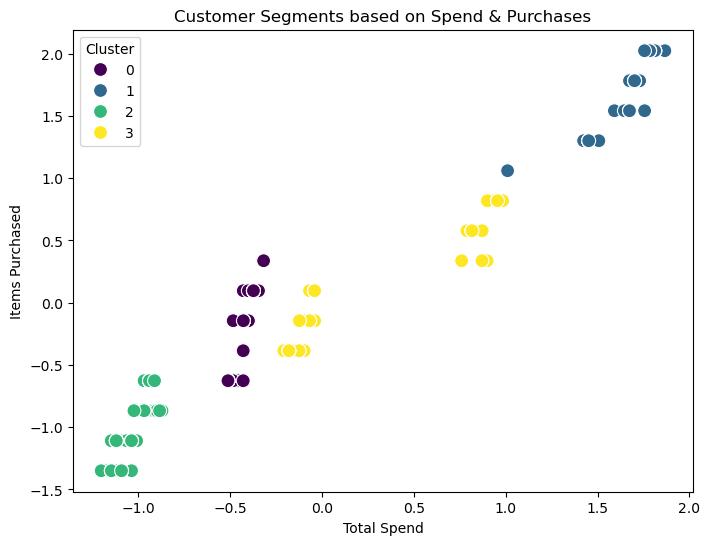

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Total Spend'], y=df['Items Purchased'], hue=df['Cluster'], palette='viridis', s=100)
plt.xlabel("Total Spend")
plt.ylabel("Items Purchased")
plt.title("Customer Segments based on Spend & Purchases")
plt.legend(title="Cluster")
plt.show()

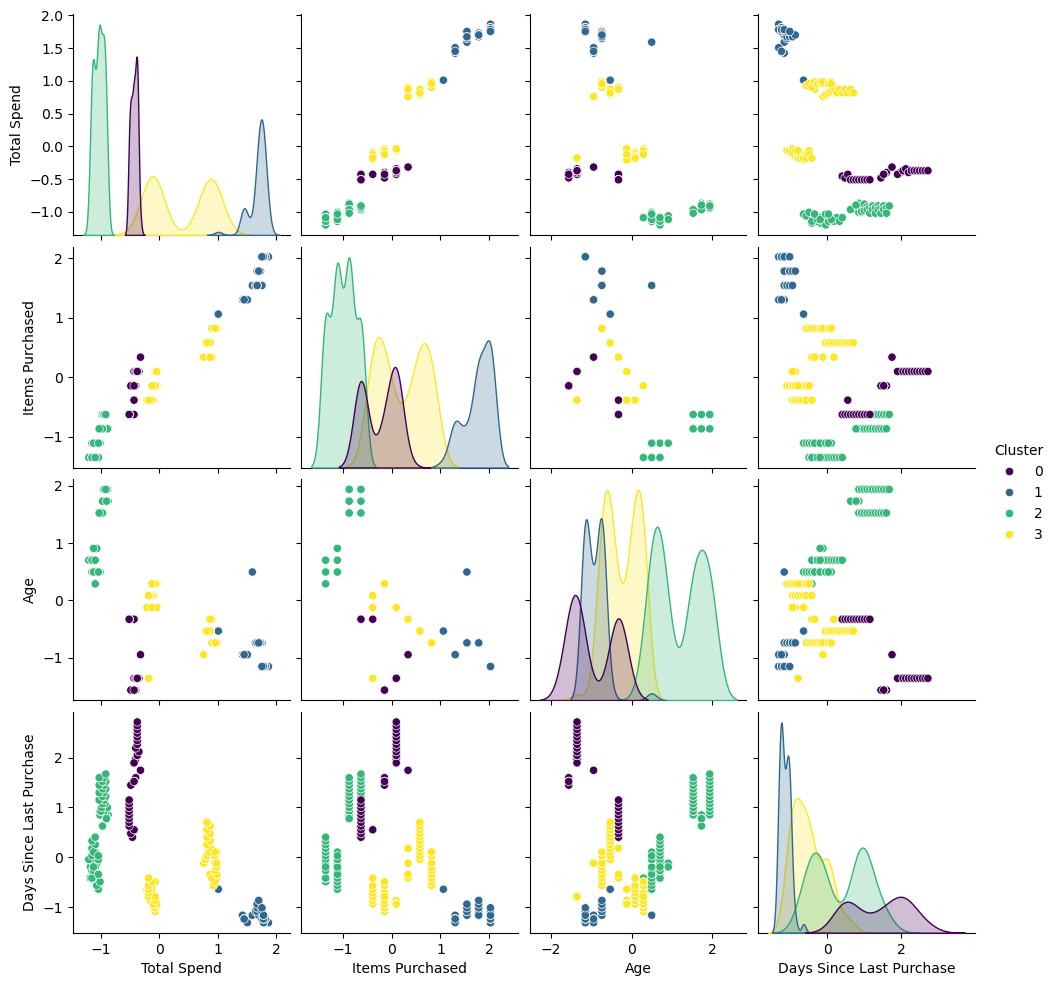

In [10]:
# Selecting features for visualization
features = ["Total Spend", "Items Purchased", "Age", "Days Since Last Purchase"]

# Pair plot with cluster hue
sns.pairplot(df, vars=features, hue="Cluster", palette="viridis")
plt.show()


In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
import pickle


In [12]:
# Load preprocessed data
df = pd.read_csv(r"C:\Users\keert\OneDrive\Desktop\Shopping_Deals_Recommeneder\dataset\cleaned_data.csv")

# Display dataset
print(df.head())


   Customer ID  Gender  Age           City Membership Type  Total Spend  \
0          101  Female   29       New York            Gold      1120.20   
1          102    Male   34    Los Angeles          Silver       780.50   
2          103  Female   43        Chicago          Bronze       510.75   
3          104    Male   30  San Francisco            Gold      1480.30   
4          105    Male   27          Miami          Silver       720.40   

   Items Purchased  Average Rating  Discount Applied  \
0               14             4.6              True   
1               11             4.1             False   
2                9             3.4              True   
3               19             4.7             False   
4               13             4.0              True   

   Days Since Last Purchase Satisfaction Level  
0                        25          Satisfied  
1                        18            Neutral  
2                        42        Unsatisfied  
3               

In [13]:
# Create a pivot table (User-Item Matrix)
user_item_matrix = df.pivot_table(index="Customer ID", columns="Items Purchased", values="Total Spend", fill_value=0)

# Convert to sparse matrix format
sparse_matrix = csr_matrix(user_item_matrix)

print("User-Item Matrix Shape:", user_item_matrix.shape)


User-Item Matrix Shape: (350, 15)


In [14]:
# Compute cosine similarity between users
user_similarity = cosine_similarity(sparse_matrix)

# Convert to DataFrame
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

print("User Similarity Matrix:")
print(user_similarity_df.head())


User Similarity Matrix:
Customer ID  101  102  103  104  105  106  107  108  109  110  ...  441  442  \
Customer ID                                                    ...             
101          1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
102          0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
103          0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
104          0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
105          0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

Customer ID  443  444  445  446  447  448  449  450  
Customer ID                                          
101          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
102          0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
103          0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
104          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
105          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 350 columns]


In [23]:
def recommend_deals(customer_id, num_recommendations=5):
    if customer_id not in user_similarity_df.index:
        return "Customer not found."

    # Get similarity scores for the given customer (excluding themselves)
    similar_users = user_similarity_df[customer_id].sort_values(ascending=False)[1:10]

    print(f"Top similar users for {customer_id}:", similar_users.index.tolist())

    # Get items the customer has already purchased
    purchased_items = df[df['Customer ID'] == customer_id]['Items Purchased'].unique()
    print(f"Items already purchased by {customer_id}:", purchased_items)

    # Get items purchased by similar users
    similar_user_ids = similar_users.index
    recommended_items = df[df['Customer ID'].isin(similar_user_ids)]['Items Purchased']

    print(f"Raw recommended items (before filtering) for {customer_id}:", recommended_items.tolist())

    # Instead of removing all existing items, rank items by popularity
    top_items = recommended_items.value_counts().index.tolist()

    # Remove only if all recommended items are the same
    if set(top_items) == set(purchased_items):
        print(f"All recommended items match previously purchased ones. Expanding recommendations.")
        top_items = df['Items Purchased'].value_counts().index[:num_recommendations].tolist()

    print(f"Final recommendations for {customer_id}:", top_items[:num_recommendations])

    return top_items[:num_recommendations]

# Test the function
print(recommend_deals(102))
print(recommend_deals(105))


Top similar users for 102: [300, 305, 252, 138, 311, 413, 240, 323, 401]
Items already purchased by 102: [11]
Raw recommended items (before filtering) for 102: [11, 11, 11, 11, 11, 11, 11, 11, 11]
All recommended items match previously purchased ones. Expanding recommendations.
Final recommendations for 102: [10, 9, 8, 12, 13]
[10, 9, 8, 12, 13]
Top similar users for 105: [392, 132, 255, 314, 416, 141, 153, 404, 326]
Items already purchased by 105: [13]
Raw recommended items (before filtering) for 105: [13, 13, 13, 13, 13, 13, 13, 13, 13]
All recommended items match previously purchased ones. Expanding recommendations.
Final recommendations for 105: [10, 9, 8, 12, 13]
[10, 9, 8, 12, 13]


In [24]:
from sklearn.metrics import mean_squared_error

# Sample actual and predicted values
actual = np.array([4.0, 3.5, 5.0, 4.0])
predicted = np.array([4.2, 3.6, 4.8, 3.9])

rmse = np.sqrt(mean_squared_error(actual, predicted))
print("RMSE:", rmse)


RMSE: 0.1581138830084191


In [25]:
import os

# Create the "notebooks" directory if it doesn't exist
os.makedirs("notebooks", exist_ok=True)

# Save the model
with open("notebooks/collaborative_model.pkl", "wb") as f:
    pickle.dump(user_similarity_df, f)

print("Model saved successfully!")


Model saved successfully!


In [27]:
print(recommend_deals(104))
print(recommend_deals(107))


Top similar users for 104: [104, 403, 355, 379, 427, 332, 339, 338, 337]
Items already purchased by 104: [19]
Raw recommended items (before filtering) for 104: [19, 10, 18, 12, 8, 19, 19, 19, 19]
Final recommendations for 104: [19, 10, 18, 12, 8]
[19, 10, 18, 12, 8]
Top similar users for 107: [370, 173, 382, 257, 155, 215, 125, 316, 430]
Items already purchased by 107: [15]
Raw recommended items (before filtering) for 107: [15, 15, 15, 15, 15, 15, 15, 15, 15]
All recommended items match previously purchased ones. Expanding recommendations.
Final recommendations for 107: [10, 9, 8, 12, 13]
[10, 9, 8, 12, 13]


In [28]:
import joblib

# Save K-Means model
joblib.dump(kmeans, "notebooks/kmeans_model.pkl")
print("K-Means model saved successfully!")


K-Means model saved successfully!


In [29]:
import pickle

# Save User Similarity DataFrame
with open("notebooks/collaborative_model.pkl", "wb") as f:
    pickle.dump(user_similarity_df, f)

print("Collaborative Filtering model saved successfully!")


Collaborative Filtering model saved successfully!


In [30]:
# Load K-Means model
kmeans_loaded = joblib.load("notebooks/kmeans_model.pkl")
print("K-Means model loaded successfully!")


K-Means model loaded successfully!


In [31]:
# Load Collaborative Filtering model
with open("notebooks/collaborative_model.pkl", "rb") as f:
    user_similarity_df_loaded = pickle.load(f)

print("Collaborative Filtering model loaded successfully!")


Collaborative Filtering model loaded successfully!


In [36]:
import pandas as pd

# Get feature names from the trained K-Means model
expected_features = kmeans_loaded.feature_names_in_

# Create a DataFrame with the correct order of features
test_data = pd.DataFrame([[1200, 15, 30, 4.5, 10]], columns=expected_features)

# Predict using K-Means
print("Customer Segment:", kmeans_loaded.predict(test_data))


Customer Segment: [2]


In [37]:
print(recommend_deals(102))  # Check recommendations for user 102


Top similar users for 102: [300, 305, 252, 138, 311, 413, 240, 323, 401]
Items already purchased by 102: [11]
Raw recommended items (before filtering) for 102: [11, 11, 11, 11, 11, 11, 11, 11, 11]
All recommended items match previously purchased ones. Expanding recommendations.
Final recommendations for 102: [10, 9, 8, 12, 13]
[10, 9, 8, 12, 13]


In [2]:
import pandas as pd

# Full file paths
files = [
    "C:/Users/keert/OneDrive/Desktop/Shopping_Deals_Recommeneder/dataset/cleaned_data.csv",
    "C:/Users/keert/OneDrive/Desktop/Shopping_Deals_Recommeneder/dataset/clustered_data.csv",
    "C:/Users/keert/OneDrive/Desktop/Shopping_Deals_Recommeneder/dataset/processed_data.csv"
]

for file in files:
    print(f"\n🔍 Checking {file}...")
    try:
        df = pd.read_csv(file)
        print(df.head())  # Show first 5 rows
        print(df.columns)  # Show column names
    except FileNotFoundError:
        print(f"⚠️ File not found: {file}. Check the file path.")



🔍 Checking C:/Users/keert/OneDrive/Desktop/Shopping_Deals_Recommeneder/dataset/cleaned_data.csv...
   Customer ID  Gender  Age           City Membership Type  Total Spend  \
0          101  Female   29       New York            Gold      1120.20   
1          102    Male   34    Los Angeles          Silver       780.50   
2          103  Female   43        Chicago          Bronze       510.75   
3          104    Male   30  San Francisco            Gold      1480.30   
4          105    Male   27          Miami          Silver       720.40   

   Items Purchased  Average Rating  Discount Applied  \
0               14             4.6              True   
1               11             4.1             False   
2                9             3.4              True   
3               19             4.7             False   
4               13             4.0              True   

   Days Since Last Purchase Satisfaction Level  
0                        25          Satisfied  
1             

In [3]:
import pandas as pd

# Load cleaned data
df = pd.read_csv("C:/Users/keert/OneDrive/Desktop/Shopping_Deals_Recommeneder/dataset/cleaned_data.csv")

# Check for product-related columns
print(df.head())  # Show first few rows
print(df.columns)  # Show all column names


   Customer ID  Gender  Age           City Membership Type  Total Spend  \
0          101  Female   29       New York            Gold      1120.20   
1          102    Male   34    Los Angeles          Silver       780.50   
2          103  Female   43        Chicago          Bronze       510.75   
3          104    Male   30  San Francisco            Gold      1480.30   
4          105    Male   27          Miami          Silver       720.40   

   Items Purchased  Average Rating  Discount Applied  \
0               14             4.6              True   
1               11             4.1             False   
2                9             3.4              True   
3               19             4.7             False   
4               13             4.0              True   

   Days Since Last Purchase Satisfaction Level  
0                        25          Satisfied  
1                        18            Neutral  
2                        42        Unsatisfied  
3               

In [5]:
import pandas as pd

# Load cleaned data
file_path = "C:/Users/keert/OneDrive/Desktop/Shopping_Deals_Recommeneder/dataset/cleaned_data.csv"
df = pd.read_csv(file_path)

# Create an empty list to store user-item interactions
user_item_data = []

# Generate synthetic Item IDs
for index, row in df.iterrows():
    user_id = row["Customer ID"]
    num_items = row["Items Purchased"]
    rating = row["Average Rating"]

    for i in range(1, num_items + 1):
        item_id = f"Item_{user_id}_{i}"  # Synthetic Item ID
        user_item_data.append([user_id, item_id, rating])

# Create DataFrame
user_item_df = pd.DataFrame(user_item_data, columns=["user_id", "item_id", "rating"])

# Save to CSV
user_item_df.to_csv("C:/Users/keert/OneDrive/Desktop/Shopping_Deals_Recommeneder/dataset/user_item_ratings.csv", index=False)

print("✅ Synthetic user-item rating dataset created successfully!")
print(user_item_df.head())  # Show sample data


✅ Synthetic user-item rating dataset created successfully!
   user_id     item_id  rating
0      101  Item_101_1     4.6
1      101  Item_101_2     4.6
2      101  Item_101_3     4.6
3      101  Item_101_4     4.6
4      101  Item_101_5     4.6


In [6]:
import sys
!{sys.executable} -m pip install scikit-surprise


  Using cached scikit_surprise-1.1.4-cp312-cp312-win_amd64.whl


In [7]:
import sys
print(sys.executable)


C:\Users\keert\anaconda3\python.exe


In [11]:
print(df.columns)  # Check available column names


Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')


In [12]:
import joblib
import os
import pandas as pd

file_path = "C:/Users/keert/OneDrive/Desktop/Shopping_Deals_Recommeneder/dataset/user_item_ratings.csv"
df = pd.read_csv(file_path)
# Define the class first
class CollaborativeRecommender:
    def __init__(self, model):
        self.model = model

    def get_recommendations(self, user_id, num_recommendations=5):
        all_items = df['item_id'].unique()
        predictions = [(item, self.model.predict(user_id, item).est) for item in all_items]
        predictions.sort(key=lambda x: x[1], reverse=True)
        return [item for item, _ in predictions[:num_recommendations]]

# Now load the model
model_path = r"C:\Users\keert\OneDrive\Desktop\Shopping_Deals_Recommeneder\collaborative_model.pkl"
recommender = joblib.load(model_path)

# Test with a sample user ID
recommendations = recommender.get_recommendations(user_id=101)
print("Recommendations:", recommendations)


Recommendations: ['Item_352_9', 'Item_290_19', 'Item_331_11', 'Item_382_5', 'Item_236_18']


In [ ]:
# Load item metadata (if available)
items_df = pd.read_csv("C:/Users/keert/OneDrive/Desktop/Shopping_Deals_Recommeneder/dataset/items.csv")

# Ensure item_id is the common column between datasets
recommendations_df = pd.DataFrame({'item_id': recommendations})

# Merge to get item details
final_recommendations = recommendations_df.merge(items_df, on='item_id', how='left')

print(final_recommendations)
